In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Prompt: Figure out what users will donate $20,000 over the next 5 years.

### Donations.csv Analysis

In [3]:
# Read in data
donationdf = pd.read_csv('Windfall DS Challenge -- PTG/donations.csv')
donationdf = donationdf.drop(['Unnamed: 0'], axis=1)
donationdf.head()

,cand_id,trans_date,amount,age
0,candidate_84569,1987-10-06,6.0,0
1,candidate_112689,1999-04-27,75.0,0
2,candidate_86164,2006-10-05,2500.0,0
3,candidate_15589,1988-10-07,9.0,0
4,candidate_79036,1988-10-18,9.0,0


In [4]:
# Null Removal
nullct = len(donationdf) - len(donationdf.dropna())
print('There are ' + str(nullct) + ' null columns in this dataset.')
donationdf = donationdf.dropna()

There are 0 null columns in this dataset.


In [5]:
# Datetime Conversion
donationdf['trans_date'] = pd.to_datetime(donationdf['trans_date'])
donationdf = donationdf.sort_values(by=['trans_date'])
donationdf['Year'] = donationdf['trans_date'].dt.year
donationdf['Month'] = donationdf['trans_date'].dt.month
donationdf['Day'] = donationdf['trans_date'].dt.day
donationdf = donationdf.reset_index(drop=True)
donationdf.head()

,cand_id,trans_date,amount,age,Year,Month,Day
0,candidate_38049,1900-01-24,25.0,0,1900,1,24
1,candidate_79240,1900-09-22,5.0,0,1900,9,22
2,candidate_39596,1900-09-22,50.0,0,1900,9,22
3,candidate_6074,1900-09-22,15.0,79,1900,9,22
4,candidate_114001,1900-09-22,40.0,0,1900,9,22


AxesSubplot(0.127273,0.125;0.617727x0.755)


,cand_id,amount,age,Year,Month,Day
count,992225,9.922250e+05,992225.000000,992225.000000,992225.000000,992225.000000
unique,130114,NaN,NaN,NaN,NaN,NaN
top,candidate_74144,NaN,NaN,NaN,NaN,NaN
freq,1313,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.767432e+02,19.815011,2006.282856,7.118825,15.905794
std,NaN,1.854839e+04,32.437650,9.420614,3.524450,8.907416
min,NaN,0.000000e+00,-8.000000,1900.000000,1.000000,1.000000
25%,NaN,8.000000e+00,0.000000,1999.000000,4.000000,8.000000
50%,NaN,2.000000e+01,0.000000,2007.000000,7.000000,16.000000
75%,NaN,5.000000e+01,53.000000,2015.000000,10.000000,24.000000


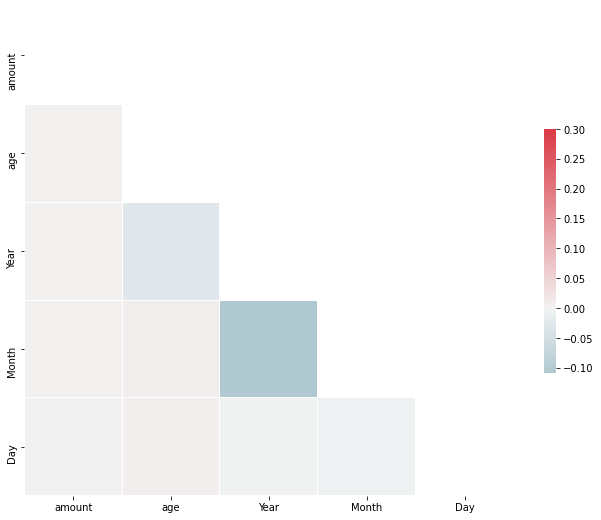

In [6]:
# High Level Donations Summary
corr = donationdf.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))
donationdf.describe(include = ['object', 'float', 'int'])

#### There are no obvious correlations here that run against the amount of money spent in these one-time donations

Year-Based Distributions


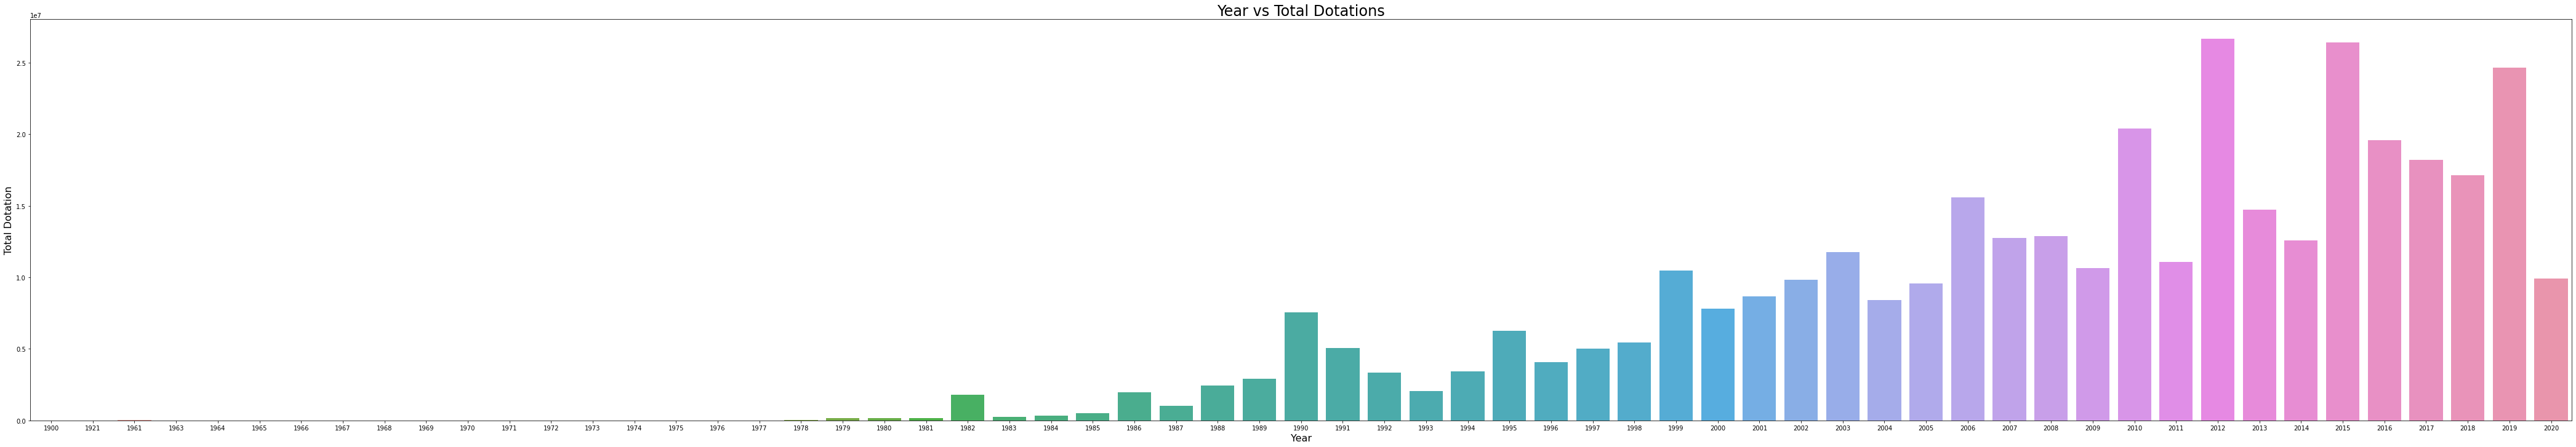

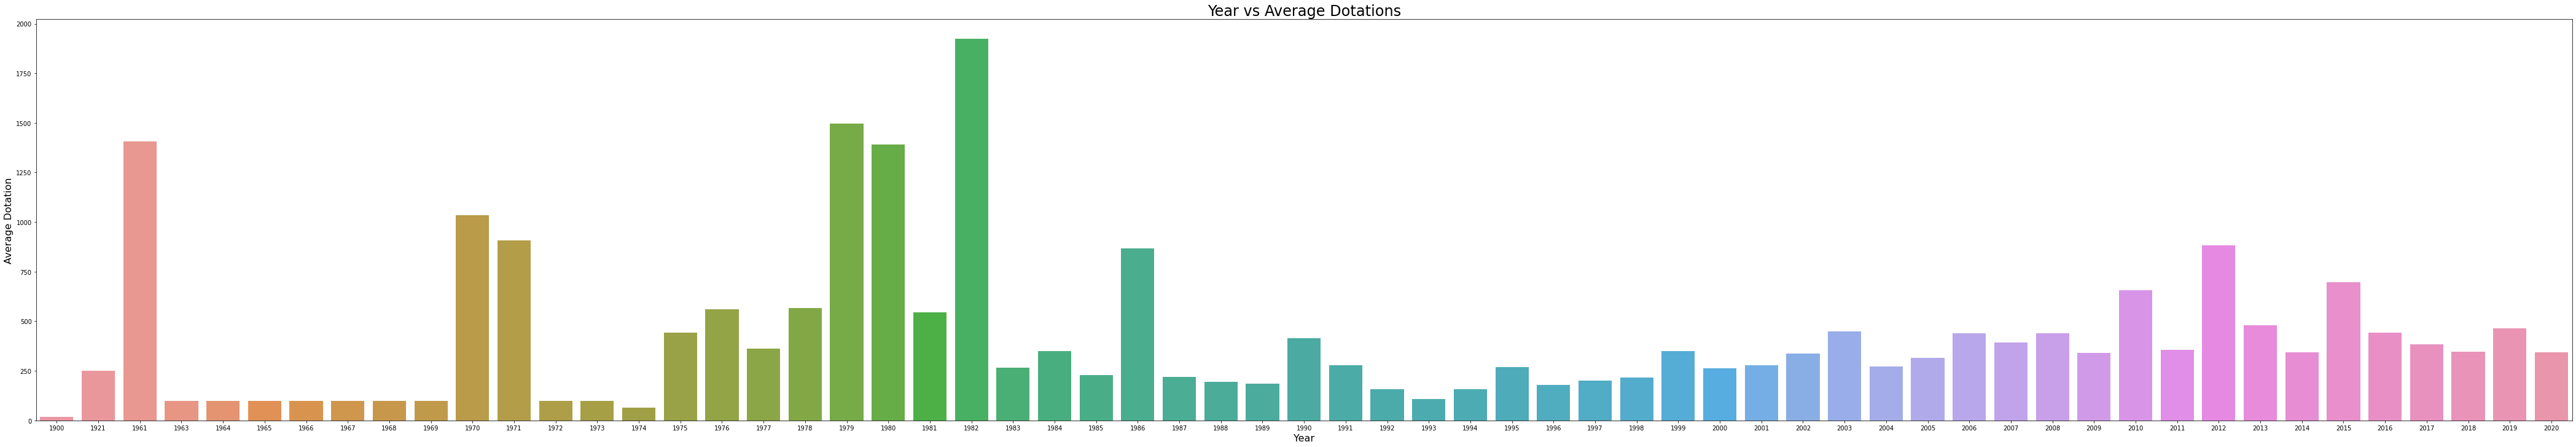

Month-Based Distributions


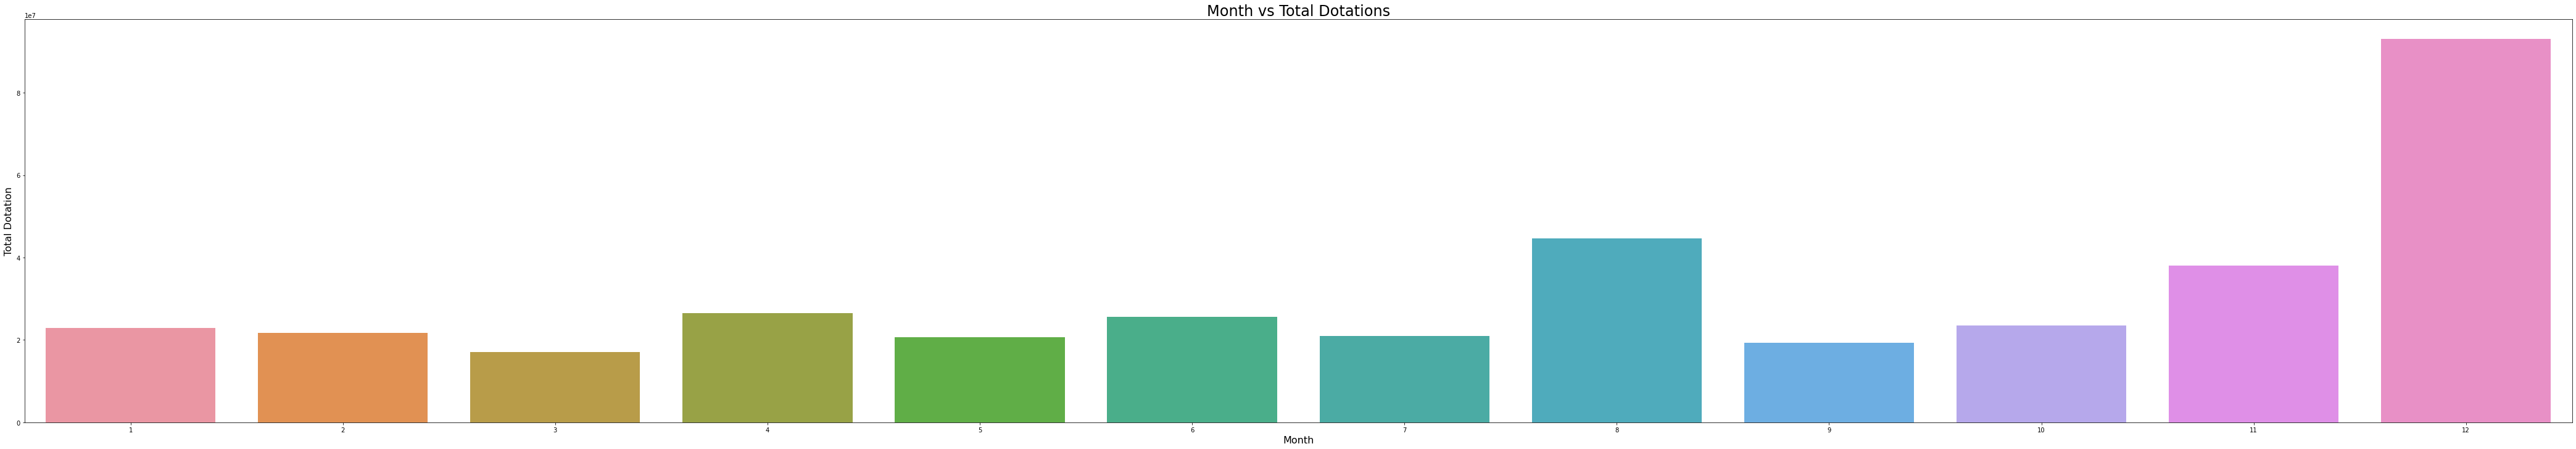

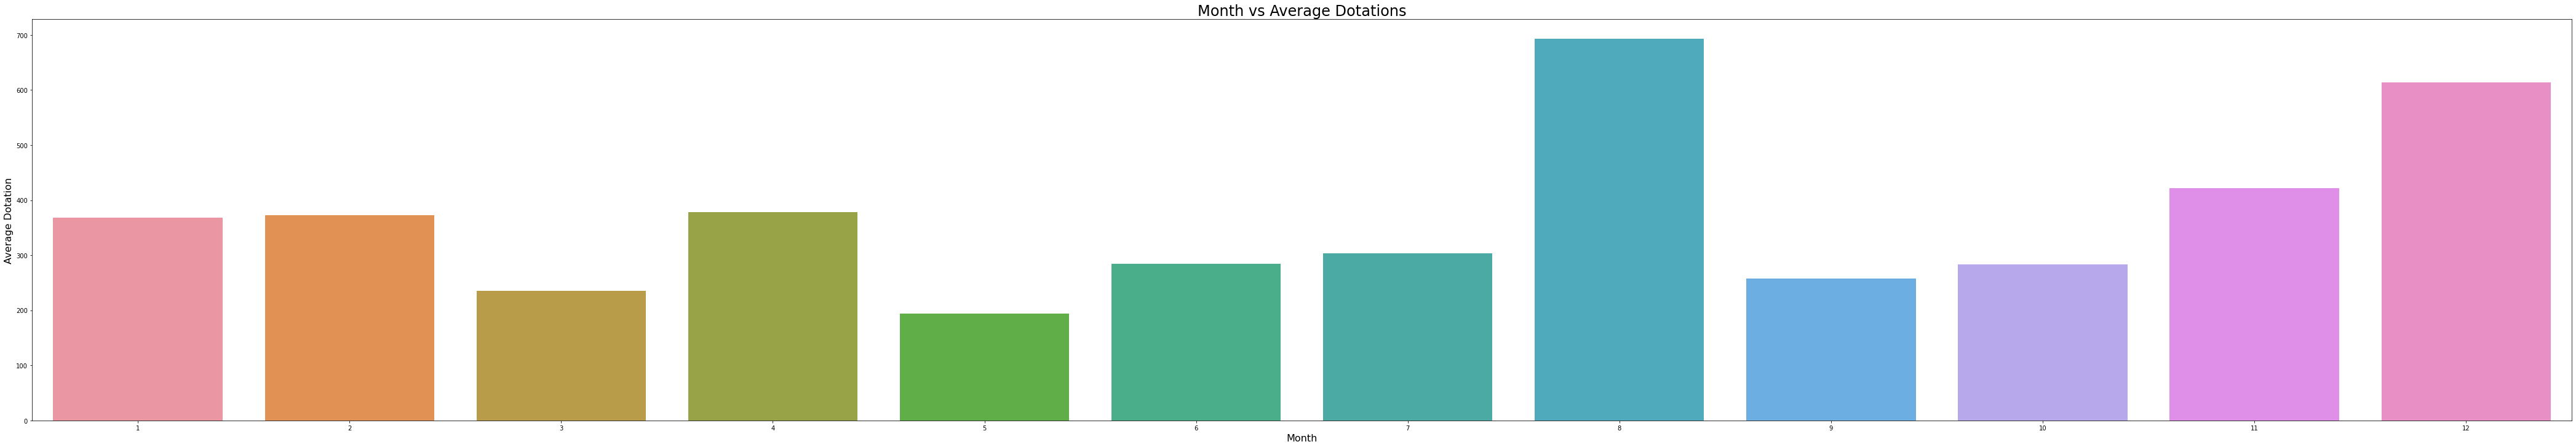

Day-Based Distributions


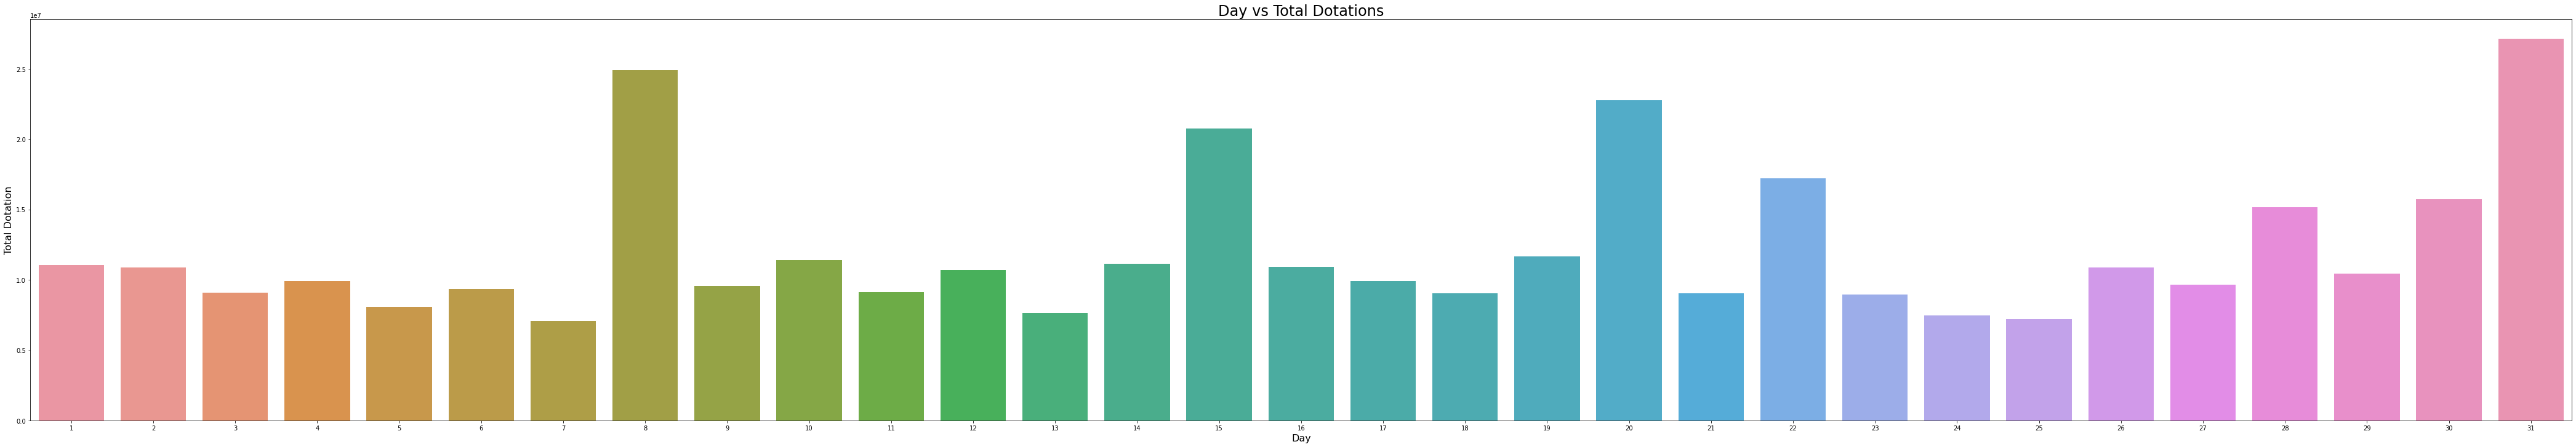

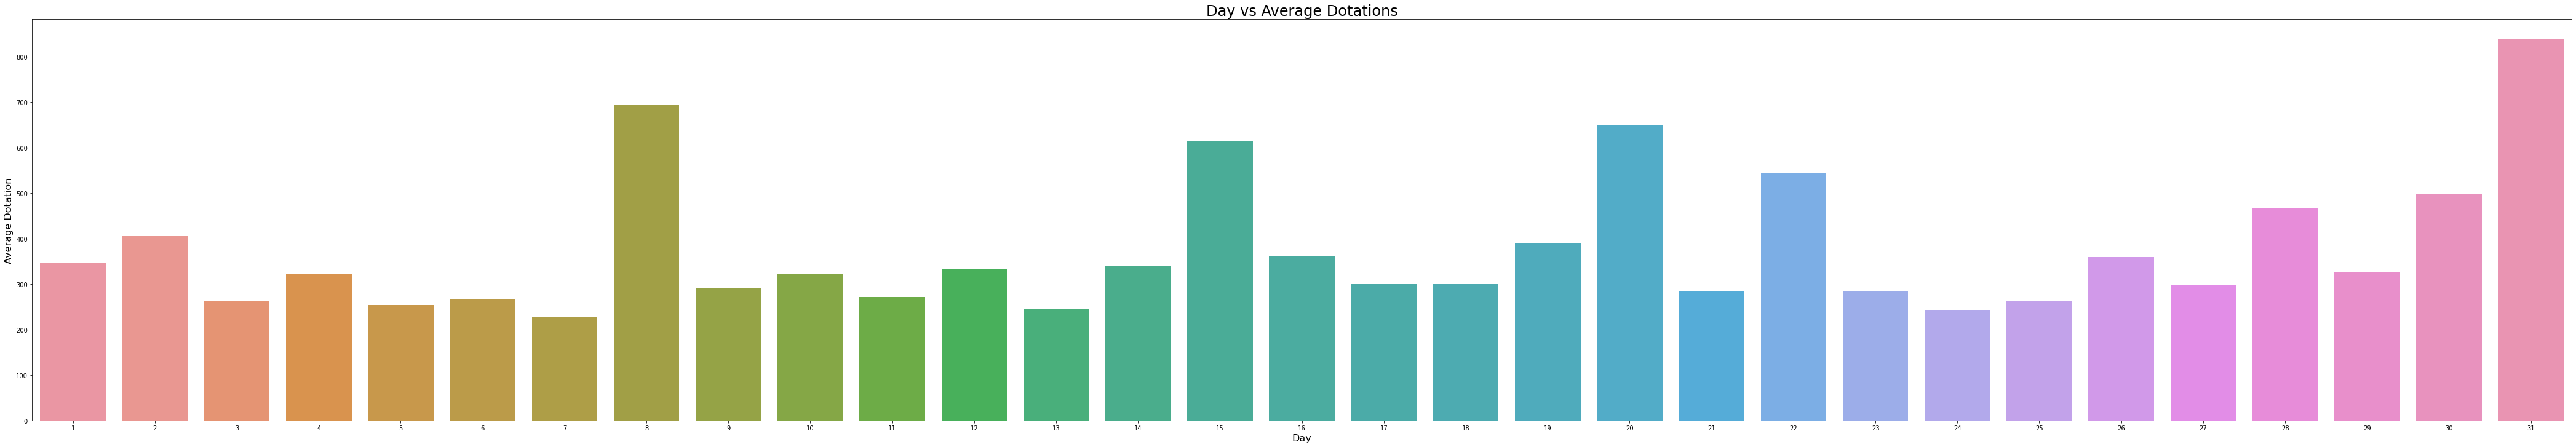

In [7]:
# Visualizing Donation Time
for interval in ['Year', 'Month', 'Day']:
    print(interval + '-Based Distributions')
    donationsumdf = donationdf[[interval, 'amount']].groupby([interval], as_index=False).sum()
    donationavgdf = donationdf[[interval, 'amount']].groupby([interval], as_index=False).mean()
    fig, ax = plt.subplots(figsize=(74,12))
    plt.title(interval + ' vs Total Dotations', fontsize=24)
    sns.barplot(x = donationsumdf[interval], y = donationsumdf['amount'], ax=ax)
    plt.xlabel(interval, fontsize=16)
    plt.ylabel('Total Dotation', fontsize=16)
    plt.show()
    fig, ax = plt.subplots(figsize=(74,12))
    plt.title(interval + ' vs Average Dotations', fontsize=24)
    sns.barplot(x = donationavgdf[interval], y = donationavgdf['amount'], ax=ax)
    plt.xlabel(interval, fontsize=16)
    plt.ylabel('Average Dotation', fontsize=16)
    plt.show()

#### There are some interesting skews here (such as the increase in average donation size in the 80's). 

In [8]:
# Donor data organization
donationagedf = donationdf[['cand_id', 'age']].groupby(['cand_id']).mean()
donationstartyeardf = donationdf[['cand_id', 'Year']].groupby(['cand_id']).min()
donationendyeardf = donationdf[['cand_id', 'Year']].groupby(['cand_id']).max()
donationsumdf = donationdf[['cand_id', 'amount']].groupby(['cand_id']).sum()
donationcountdf = donationdf[['cand_id', 'amount']].groupby(['cand_id']).count()
donordf = donationagedf.merge(donationstartyeardf, left_index=True, right_index=True)
donordf = donordf.merge(donationendyeardf, left_index=True, right_index=True)
donordf = donordf.merge(donationsumdf, left_index=True, right_index=True)
donordf = donordf.merge(donationcountdf, left_index=True, right_index=True)
donordf = donordf.rename(columns={'age': 'Age', 'Year_x': 'Start Year', 'Year_y': 'End Year', 'amount_x': 'Total Amount', 'amount_y': 'Count'})
donordf.head()

,Age,Start Year,End Year,Total Amount,Count
cand_id,,,,,
candidate_0,54,2007,2019,59581.81,61
candidate_1,0,2019,2019,25000.00,1
candidate_10,0,2006,2007,135.00,3
candidate_100,0,2014,2014,130.80,1
candidate_1000,0,2000,2000,35.00,1


AxesSubplot(0.127273,0.125;0.617727x0.755)


,Age,Start Year,End Year,Total Amount,Count
count,130114.000000,130114.000000,130114.000000,1.301140e+05,130114.000000
mean,13.216203,1999.087031,2002.466622,2.872973e+03,7.625813
std,29.089238,8.917995,9.343195,8.531785e+04,31.264616
min,-8.000000,1900.000000,1961.000000,0.000000e+00,1.000000
25%,0.000000,1992.000000,1995.000000,2.500000e+01,1.000000
50%,0.000000,1998.000000,2002.000000,6.000000e+01,1.000000
75%,0.000000,2005.000000,2009.000000,2.000000e+02,4.000000
max,125.000000,2020.000000,2020.000000,1.493831e+07,1313.000000


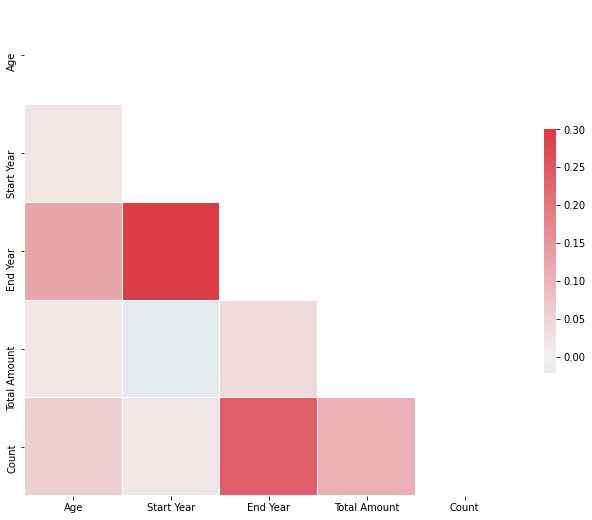

In [9]:
# High Level Donors Summary
corr = donordf.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))
donordf.describe()

#### There are no useful correlations here that run against the amount of money spent by these donors.

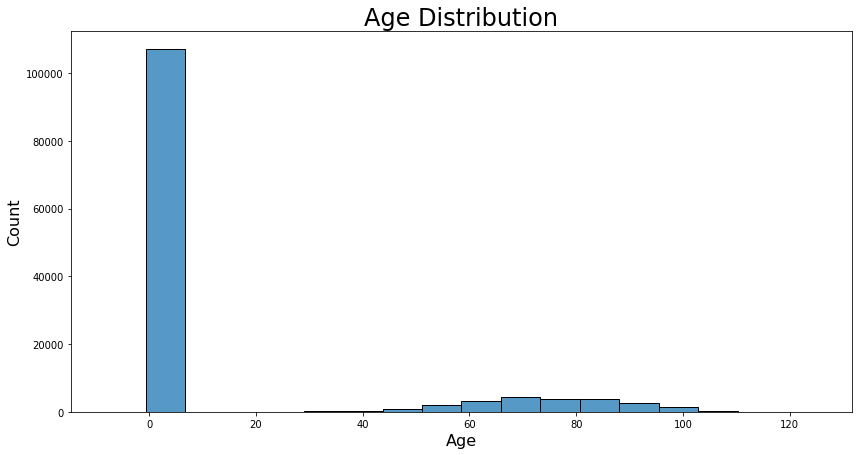

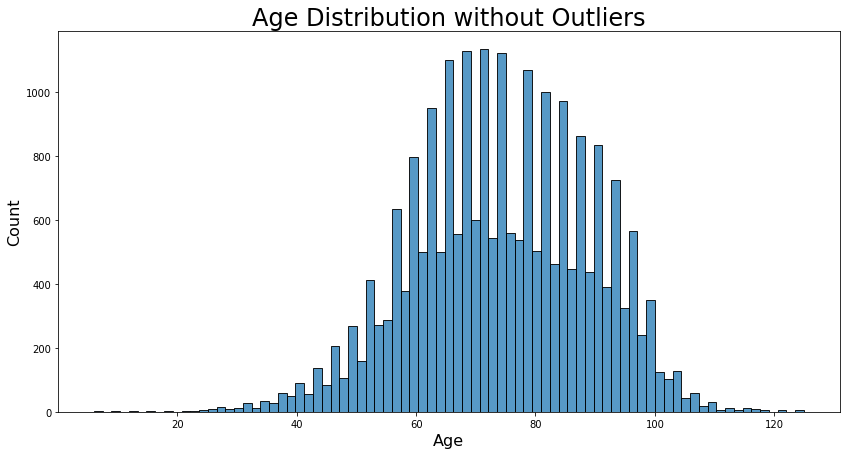

In [10]:
# Visualizing Donor Age
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Age Distribution', fontsize = 24)
sns.histplot(x = donordf['Age'].values, ax = ax)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Age Distribution without Outliers', fontsize = 24)
sns.histplot(x = donordf[donordf['Age'] > 0]['Age'].values, ax = ax)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [11]:
# Analyzing Donor Age
totalAgePct = round((100 * len(donordf[donordf['Age'] > 0]) / len(donordf)),2)
startdonationdf = donordf[donordf['Start Year'] == donordf['Start Year'].min()]
startAgePct = round((100 * len(startdonationdf[startdonationdf['Age'] > 0]) / len(startdonationdf)),2)
enddonationdf = donordf[donordf['Start Year'] == donordf['Start Year'].max()]
endAgePct = round((100 * len(enddonationdf[enddonationdf['Age'] > 0]) / len(enddonationdf)),2)
averageAge = round((donordf[donordf['Age'] > 0]['Age'].values.mean()) , 2)
print('We have the real age of ' + str(startAgePct) + '% of the donors in ' + str(donordf['Start Year'].min()) + '.')
print('We have the real age of ' + str(endAgePct) + '% of the donors in ' + str(donordf['Start Year'].max()) + '.')
print('We have the real age of ' + str(totalAgePct) + '% of the donors over all.')
print('The average donor is ' + str(averageAge) + ' years old.')

We have the real age of 20.0% of the donors in 1900.
We have the real age of 2.32% of the donors in 2020.
We have the real age of 17.79% of the donors over all.
The average donor is 74.28 years old.


#### It is likely that Age is an optional field on the donation form. Because of that, Age is not a reliable attribute, and it will be excluded in the donation prediction model. 

In [12]:
# Processing Donor Amounts
donordf['Years'] = donordf['End Year'] - donordf['Start Year'] + 1
donordf['Average Amount'] = donordf['Total Amount'] / donordf['Count']
donordf['Annual Amount'] = donordf['Total Amount'] / donordf['Years']
donordf.head()

,Age,Start Year,End Year,Total Amount,Count,Years,Average Amount,Annual Amount
cand_id,,,,,,,,
candidate_0,54,2007,2019,59581.81,61,13,976.750984,4583.216154
candidate_1,0,2019,2019,25000.00,1,1,25000.000000,25000.000000
candidate_10,0,2006,2007,135.00,3,2,45.000000,67.500000
candidate_100,0,2014,2014,130.80,1,1,130.800000,130.800000
candidate_1000,0,2000,2000,35.00,1,1,35.000000,35.000000


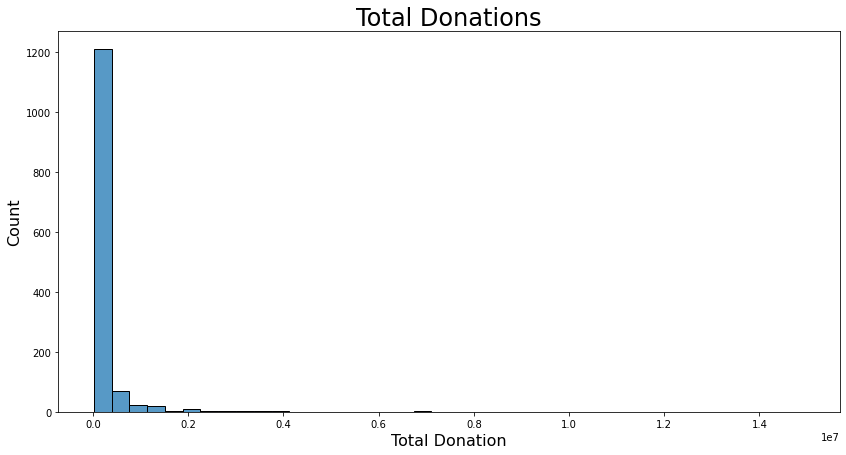

Total Donation Distribution for users who have donated over $20000
Total Donation Mean: $2872.97
Total Donation Standard Deviation: $85317.85


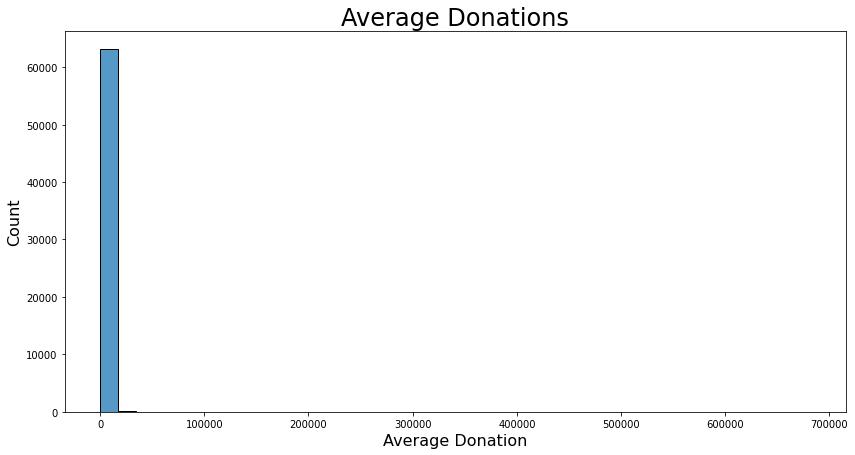

Average Donation Distribution for users who have donated more than once
Average Donation Mean: $234.45
Average Donation Standard Deviation: $4654.79


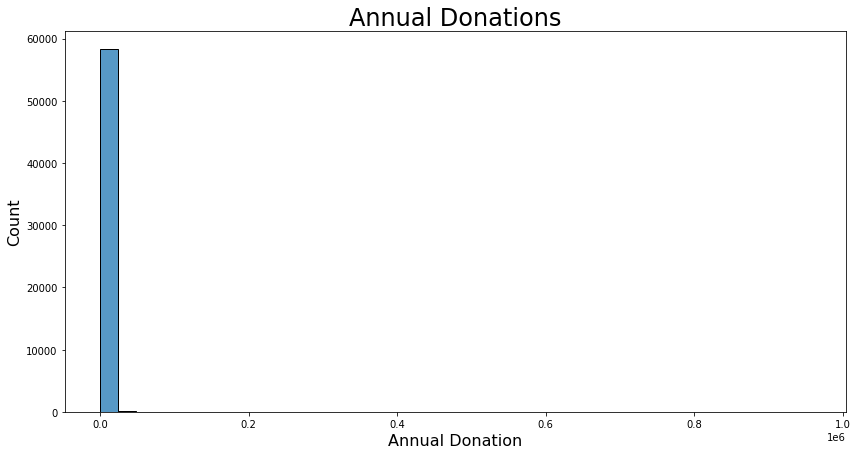

Annual Donation Distribution for users who have donated for over one year
Annual Donation Mean: $295.95
Annual Donation Standard Deviation: $6555.25


In [16]:
# Visualizing Donor Amounts
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Total Donations', fontsize = 24)
sns.histplot(x = donordf[donordf['Total Amount'] > 20000]['Total Amount'].values, ax = ax, bins = 40)
plt.xlabel('Total Donation', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()
print('Total Donation Distribution for users who have donated over $20000')
print('Total Donation Mean: $' + str(round(donordf['Total Amount'].mean(), 2)))
print('Total Donation Standard Deviation: $' + str(round(donordf['Total Amount'].std(), 2)))
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Average Donations', fontsize = 24)
sns.histplot(x = donordf[donordf['Count'] > 1]['Average Amount'].values, ax = ax, bins = 40)
plt.xlabel('Average Donation', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()
print('Average Donation Distribution for users who have donated more than once')
print('Average Donation Mean: $' + str(round(donordf['Average Amount'].mean(), 2)))
print('Average Donation Standard Deviation: $' + str(round(donordf['Average Amount'].std(), 2)))
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Annual Donations', fontsize = 24)
sns.histplot(x = donordf[donordf['Years'] > 1]['Annual Amount'].values, ax = ax, bins = 40)
plt.xlabel('Annual Donation', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()
print('Annual Donation Distribution for users who have donated for over one year')
print('Annual Donation Mean: $' + str(round(donordf['Annual Amount'].mean(), 2)))
print('Annual Donation Standard Deviation: $' + str(round(donordf['Annual Amount'].std(), 2)))

In [24]:
# Basic Donor Amount Statistics
bigdonordf = donordf[donordf['Total Amount'] >= 20000]
bigdonoryeardf = donordf[donordf['Annual Amount'] >= 4000]
bigdonorcount = len(bigdonordf)
bigdonoryearcount = len(bigdonoryeardf)
bigdonorpct = round((100 * len(bigdonordf)/len(donordf)),2)
bigdonoryearpct = round((100 * len(bigdonoryeardf)/len(donordf)),2)
print(str(bigdonorcount) + ' (' + str(bigdonorpct) + '%) donors have donated atleast 20k total')
print(str(bigdonoryearcount) + ' (' + str(bigdonoryearpct) + '%) donors have consistently donated atleast 4k a year')

1366 (1.05%) donors have donated atleast 20k total
993 (0.76%) donors have consistently donated atleast 4k a year


#### A naive approach to the problem would be to contact this small subset of users that have historically donated atleast $20k

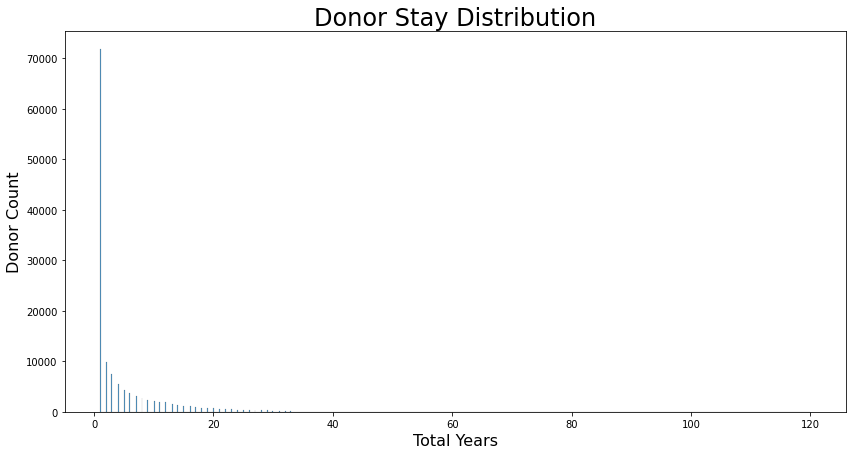

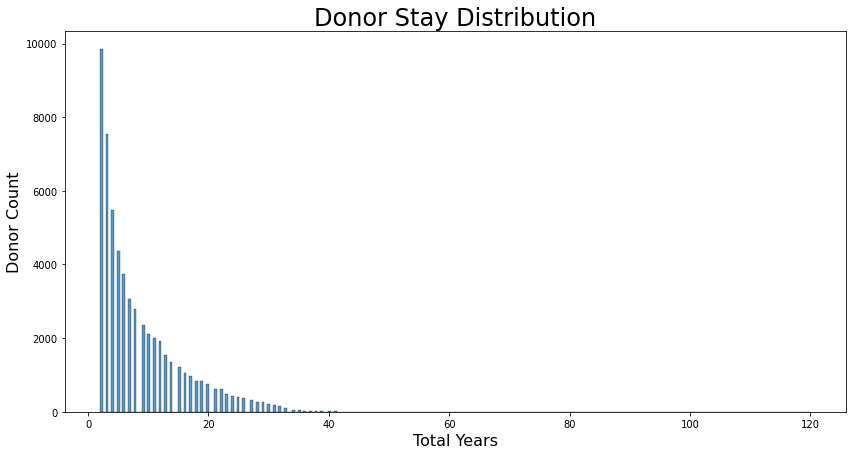

130114 (100.0%) donors have stayed for atleast 0 years
58403 (44.89%) donors have stayed for atleast 1 years
48563 (37.32%) donors have stayed for atleast 2 years
41031 (31.53%) donors have stayed for atleast 3 years
35556 (27.33%) donors have stayed for atleast 4 years
31196 (23.98%) donors have stayed for atleast 5 years
27458 (21.1%) donors have stayed for atleast 6 years
24395 (18.75%) donors have stayed for atleast 7 years
21603 (16.6%) donors have stayed for atleast 8 years
19253 (14.8%) donors have stayed for atleast 9 years
17146 (13.18%) donors have stayed for atleast 10 years


In [35]:
# Visualizing Donor Years
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Donor Stay Distribution', fontsize = 24)
sns.histplot(x = donordf['Years'].values, ax = ax)
plt.xlabel('Total Years', fontsize = 16)
plt.ylabel('Donor Count', fontsize = 16)
plt.show()
fig, ax = plt.subplots(figsize = (14,7))
plt.title('Donor Stay Distribution', fontsize = 24)
sns.histplot(x = donordf[donordf['Years'] > 1]['Years'].values, ax = ax)
plt.xlabel('Total Years', fontsize = 16)
plt.ylabel('Donor Count', fontsize = 16)
plt.show()
for k in range(-1, 10):
    overYearCount = len(donordf[donordf['Years'] > (k+1)])
    overYearPct = round((100 * len(donordf[donordf['Years'] > (k+1)]) / len(donordf)),2)
    print(str(overYearCount) + ' (' + str(overYearPct) + '%) donors have stayed for atleast ' + str(k+1) + ' years')
#+ print year vs %of total results 
#    (ex: >1 year is 100%)

#### The best way to approach the main problem is to use previous years' donations to predict the next 5 years donations. This means removing atleast 50% of the donors as prospects.

### Donations.csv Cleaning

In [72]:
# Setting up donor attributes
yearlydonordf = donationdf[['cand_id', 'Year', 'amount']]
yearlydonordf = yearlydonordf.groupby(['cand_id', 'Year'], as_index = False).sum()
yearlydonordf = yearlydonordf.merge(donordf, left_on='cand_id', right_index=True)
yearlydonordf = yearlydonordf[yearlydonordf['Years'] > 1]
yearlydonordf = yearlydonordf[yearlydonordf['Start Year'] < 2019]
yearlydonors = yearlydonordf['cand_id'].unique()
yearlydonorpct = round((100 * len(yearlydonors) / len(donordf)), 2)
print('After this round of data removal, only ' + str(len(yearlydonors)) + ' donors out of ' + str(len(donordf)) + ' donors remain (' + str(yearlydonorpct) + '%)')
yearlydonordf.head()

After this round of data removal, only 57944 donors out of 130114 donors remain (44.53%)


,cand_id,Year,amount,Age,Start Year,End Year,Total Amount,Count,Years,Average Amount,Annual Amount
0,candidate_0,2007,50.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154
1,candidate_0,2009,234.39,54,2007,2019,59581.81,61,13,976.750984,4583.216154
2,candidate_0,2010,912.50,54,2007,2019,59581.81,61,13,976.750984,4583.216154
3,candidate_0,2011,1000.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154
4,candidate_0,2012,4600.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154


#### In order to use historic data for predictions, incomplete data (ex. donors with 1 year) and partial data (ex. donors starting in 2019 or 2020) need to be removed.

In [77]:
# Setting up donor target variable
alldotationnext5s = []
for donor in yearlydonors:
    dotationnext5s = []
    subdonordf = yearlydonordf[yearlydonordf['cand_id'] == donor]
    subdonoryears = subdonordf['Year'].values
    for year in subdonoryears:
        dotationnext5s.append(subdonordf[(subdonordf['Year'] > year) & (subdonordf['Year'] < year + 6)]['amount'].sum())
    alldotationnext5s.extend(dotationnext5s)
# efficiency with pd?

In [98]:
# Finalizing Full Donor attributes
yearlydonordf['Next 5 Year Amount'] = alldotationnext5s
yearlydonordf['Years Spent'] = yearlydonordf['Year'] - yearlydonordf['Start Year'] + 1
yearlydonordf['Good Donor'] = np.where(yearlydonordf['Next 5 Year Amount'] >= 20000, 1, 0)
yearlydonordf['Rolling Total'] = yearlydonordf.groupby('cand_id')['amount'].transform(lambda x: x.expanding().sum())
yearlydonordf['Rolling Average'] = yearlydonordf.groupby('cand_id')['amount'].transform(lambda x: x.expanding().mean())
yearlydonordf.head(15)

,cand_id,Year,amount,Age,Start Year,End Year,Total Amount,Count,Years,Average Amount,Annual Amount,Next 5 Year Amount,Years Spent,Good Donor,Rolling Amount,Rolling Total,Rolling Average
0,candidate_0,2007,50.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154,6746.89,1,0,50.00,50.00,50.000000
1,candidate_0,2009,234.39,54,2007,2019,59581.81,61,13,976.750984,4583.216154,24062.51,3,1,284.39,284.39,142.195000
2,candidate_0,2010,912.50,54,2007,2019,59581.81,61,13,976.750984,4583.216154,28650.01,4,1,1196.89,1196.89,398.963333
3,candidate_0,2011,1000.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154,31400.01,5,1,2196.89,2196.89,549.222500
4,candidate_0,2012,4600.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154,38409.95,6,1,6796.89,6796.89,1359.378000
5,candidate_0,2013,1950.01,54,2007,2019,59581.81,61,13,976.750984,4583.216154,44334.91,7,1,8746.90,8746.90,1457.816667
6,candidate_0,2014,15600.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154,35234.91,8,1,24346.90,24346.90,3478.128571
7,candidate_0,2015,5500.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154,29734.91,9,1,29846.90,29846.90,3730.862500
8,candidate_0,2016,3750.00,54,2007,2019,59581.81,61,13,976.750984,4583.216154,25984.91,10,1,33596.90,33596.90,3732.988889
9,candidate_0,2017,11609.94,54,2007,2019,59581.81,61,13,976.750984,4583.216154,14374.97,11,0,45206.84,45206.84,4520.684000


In [99]:
# Export to csv
yearlydonordf.to_csv('Windfall DS Challenge -- PTG/Donors.csv', index=False)

In [ ]:
# Outlier Removal
# Not neccesary since classification problem
def zstats(num):
    subdonationdf = donationdf[donationdf['zscore'] < num]
    subdonationdf = subdonationdf[subdonationdf['zscore'] > (-1*num)]
    return [len(subdonationdf), round(100*len(subdonationdf)/len(donationdf),4), subdonationdf]
donationdf['zscore'] = (donationdf['amount'] - donationdf['amount'].mean())/donationdf['amount'].std(ddof=0)
print('base: ' + str(len(donationdf)))
for k in range(3):
    znum = 3.5-k
    donationzstats = zstats(znum)
    print('z-bound ' + str(znum) + ': ' + str(donationzstats[0]) + ' or ' + str(donationzstats[1]) + '%')